In [11]:
#Se importan las librerías y módulos necesarios

import warnings
warnings.filterwarnings("ignore")
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from scipy import stats
from scipy.stats import t, sem

In [12]:
#Se carga el csv seleccionado para crear el dataframe
brew_df = pd.read_csv('./input/export_dataframe.csv', engine = 'python')

In [60]:
brew_df.columns

Index(['checkin_id', 'created_at', 'rating_score', 'user_id', 'beer_id',
       'beer_name', 'beer_style', 'beer_slug', 'brewery_name',
       'brewery_country', 'brewery_city', 'venue_country', 'venue_city'],
      dtype='object')

In [13]:
brew_df.head()

,checkin_id,created_at,rating_score,user_id,beer_id,beer_name,beer_style,beer_slug,brewery_name,brewery_country,brewery_city,venue_country,venue_city
0,920012809,2020,4.00,1279815,3459729,Доза [Mango + Passion Fruit],Sour - Fruited,4brewers-doza-mango-passion-fruit,4BREWERS,Russia,Vladimir,Belarus,Minsk
1,919968334,2020,4.00,1279815,3871898,Доза [Mango + Peach + Orange],Sour - Fruited,4brewers-doza-mango-peach-orange,4BREWERS,Russia,Vladimir,Belarus,Minsk
2,919919437,2020,3.75,1279815,3861542,Lobster On Acid,Sour - Fruited Gose,wild-lab-lobster-on-acid,Wild Lab,Russia,Moscow,Belarus,Minsk
3,919910138,2020,4.25,1279815,2575473,Жажда [Облепиха],Sour - Fruited Gose,4brewers-zhazhda-oblepiha,4BREWERS,Russia,Vladimir,Belarus,Minsk
4,919904871,2020,4.25,1279815,3840474,Balloon,Sour - Fruited,red-button-brewery-baloon,Red Button Brewery,Russia,Moscow,Belarus,Minsk


In [34]:
style_cnt = brew_df.groupby(['beer_style'])['checkin_id'].count().sort_values(ascending=False).head()
style_cnt

beer_style
Sour - Fruited                    300
Sour - Fruited Gose               143
IPA - American                    121
Sour - Fruited Berliner Weisse    102
Pale Ale - American                95
Name: checkin_id, dtype: int64

<AxesSubplot:ylabel='checkin_id'>

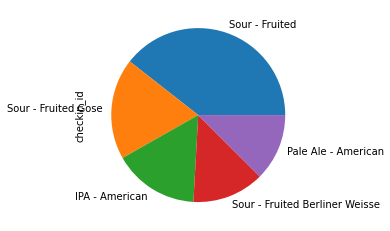

In [40]:
style_cnt.plot.pie()

In [65]:
country_cnt = brew_df.groupby(['venue_country'])['checkin_id'].count().sort_values(ascending=False).head()
country_cnt

venue_country
Belarus    2105
Latvija      65
Lietuva      61
Russia       35
Eesti        28
Name: checkin_id, dtype: int64

<AxesSubplot:ylabel='checkin_id'>

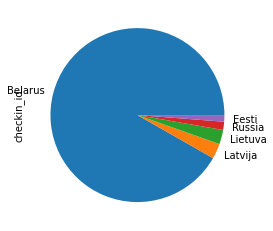

In [66]:
country_cnt.plot.pie()

,checkin_id
created_at,
2017,13
2018,39
2019,124
2020,112


<AxesSubplot:xlabel='created_at'>

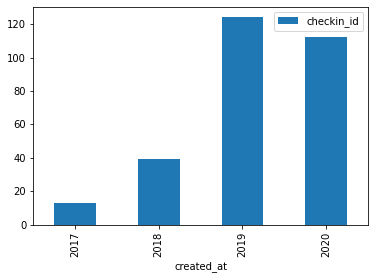

In [68]:
a =  brew_df[brew_df.venue_country == "Belarus"]
Style1 = a[a.beer_style=="Sour - Fruited"].groupby("created_at").agg({"checkin_id":"count"})

display(Style1)
Style1.plot(kind='bar')

,checkin_id
created_at,
2017,1
2018,23
2019,80
2020,26


<AxesSubplot:xlabel='created_at'>

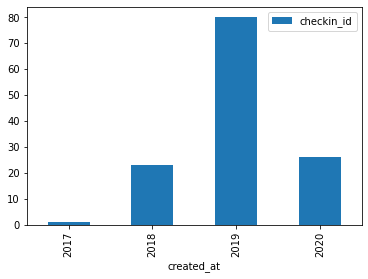

In [70]:
a =  brew_df[brew_df.venue_country == "Belarus"]
Style2 = a[a.beer_style=="Sour - Fruited Gose"].groupby("created_at").agg({"checkin_id":"count"})

display(Style2)
Style2.plot(kind='bar')